# Matches

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from pwca import *
from glob import glob
import lalsimulation as lalsim
from nrutils.analyze.match import match as match_object

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from Welsh Puck (aka pwca).
(pwca.core)>> Catalog of calibration runs stored to "pwca.pwca_catalog"
(pwca.core)>> Metadata dictionary for calibration runs stored to "pwca.metadata_dict"
(pwca.core)>> Metadata dictionary for Ed's catalog paper stoed to "pwca.catalog_paper_metadata"


In [7]:
# # Select single simulation based on name
# a = scsearch( catalog=pwca_catalog, keyword='q4a04t60dPm1.5D_T_96_360', verbose=True )[0];

#
package_dir = parent( pwca.__path__[0] )
datadir = package_dir + 'data/version2/'
files = glob( datadir+'q*.txt' )

match_list = []
for a in pwca_catalog:
    
    #
    file_ = [ k for k in files if a.simname in k ][0]
    
    #
    Msol = 100.0
    Dmpc = 1000.0
    #
    theta = 0
    phi   = 0
    #
    fmin = 30.0
    fmax = 300.0
    
    # Load data for this case
    raw_data = loadtxt(file_)
    f,amp_td,amp_fd,dphi_td,dphi_fd,phi_td,phi_fd = raw_data.T
    hcode_ = amp_td * exp( 1j * phi_td ) * sYlm(-2,2,2,theta,phi)
    hcode = array([f,hcode_*0.5,hcode_*0.5*1j]).T

    # Generate NR FD waveform array
    # ------------------------------------------------ #
    mask = f>0
    f     = f[mask]
    hcode = hcode[mask,:]
    hphys = physhf(hcode,Msol,Dmpc)

    # Generate MODEL FD waveform array
    # ------------------------------------------------ #
    # Generate a coprecessing waveform as 1D array
    hmodel = generate_pwca_waveform( f, a.m1, a.m2, a.X1, a.X2, a.L ) * sYlm(-2,2,2,theta,phi)
    hmodel_p = 0.5*(hmodel)
    hmodel_c = -1j*0.5*(hmodel)
    hcode_model = array([f,hmodel_p,hmodel_c]).T
    hphys_model = physhf( hcode_model,Msol,Dmpc )

    # #
    # figure()
    # f,hp,hc = hcode.T
    # plot( f, abs(hp+1j*hc) )
    # plot( f, abs(hmodel) )
    # f,hp,hc = hcode_model.T
    # plot( f, abs(hp+1j*hc) )
    # xscale('log')
    # yscale('log')
    # ylim(1e-4,1e2)

    # #
    # figure()
    # f,hp,hc = hphys.T
    # plot( f, abs(hp+1j*hc) )
    # f,hp,hc = hphys_model.T
    # plot( f, abs(hp+1j*hc) )
    # xscale('log')
    # yscale('log')

    #
    phys_signal   = hphys
    phys_template = hphys_model

    # Create match object
    mo = match_object( phys_template, phys_signal, fmin=fmin, fmax=fmax, signal_polarization=0, positive_f=True, psd_thing = lalsim.SimNoisePSDaLIGOZeroDetHighPower )


    # mo.plot()
    # break

    mx = mo.calc_template_pol_optimized_match()
    print a.simname,'\t',mx
    match_list.append(mx)

(pwca.core)>> Catalog of calibration runs stored to "pwca.pwca_catalog"
(pwca.core)>> Metadata dictionary for calibration runs stored to "pwca.metadata_dict"
(pwca.core)>> Metadata dictionary for Ed's catalog paper stoed to "pwca.catalog_paper_metadata"
q8a08t120dP2_r03_T_96_360 	0.9969516994926035
q8a04t60D_dPm1 	0.9995950872804062
q4a08t90dPm1D_T_96_384 	0.9992007095447629
q8a04t120dPp1_T_96_360 	0.9996764155095735
q8a04t90dP0_T_96_360 	0.9994171894950805
q2_a10_a28_ph0_th150 	0.9998462432144172
q2_a10_a28_ph0_th120 	0.9996815760372064
q2_a10_a28_ph0_th90 	0.9991894589572862
q2_a10_a28_ph0_th60 	0.9986244908500497
q2_a10_a28_ph0_th30 	0.9993063241079473
q8a08t90dP0_T_96_384 	0.995528699457358
q4a08t30dPm5p5dRm47_T_96_360 	0.99875523382229
q4a08t60dPm3dRm250_T_96_384 	0.998313771277388
q8a08t150dP2_T_120_480 	0.9994155282718498
q4a04t60dPm1.5D_T_96_360 	0.9998535328671333
q4a04t30_T_96_360 	0.9998776869285441
q8a08t60Ditm45dr075_96_360 	0.9973894343691239
q8a08t30dPm9.35_r0.5_T_96_360

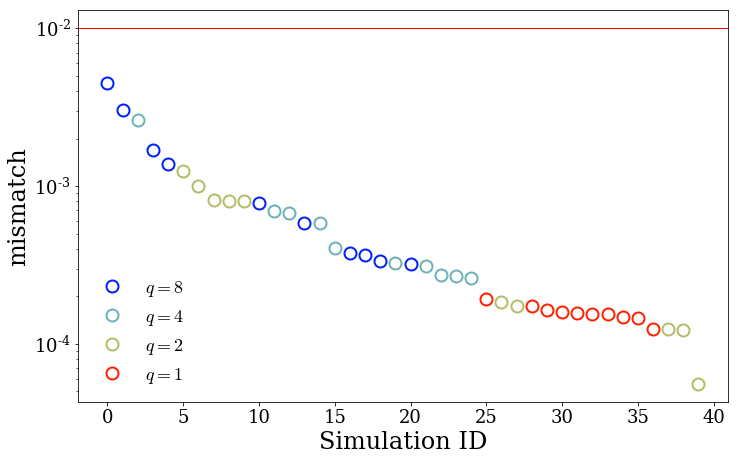

In [27]:

figure(figsize=1.8*figaspect(0.618))

mask = argsort(match_list)

clr=rgb(4,jet=True)

q_set = [1,2,4,8]
passed_q = []
for k,a in enumerate(pwca_catalog):

    q = int( round(a.m1/a.m2,2) )
    plot( k, 1-match_list[ mask[k] ], mew=2, ms=12, ls='none', marker='o', mfc='none', color=clr[q_set.index(q)], label= '$q=%i$'%q if not (q in passed_q) else None )
    passed_q.append(q)
    
    axhline(1e-2,ls='-',color='r')
    yscale('log')
    xlabel('Simulation ID')
    ylabel('mismatch')
    
    legend()

In [9]:
mask = argsort(match_list)

for k in mask:
    
    print pwca_catalog[k].simname.replace('_','')[:18],'\t\t\t\t',match_list[k]#,'\t\t\t\t',catalog_paper_metadata[pwca_catalog[k].simname]['eccentricity']

q8a08t90dP0T96384 				0.995528699457358
q8a08t120dP2r03T96 				0.9969516994926035
q8a08t60Ditm45dr07 				0.9973894343691239
q4a08t60dPm3dRm250 				0.998313771277388
q2a10a28ph0th60 				0.9986244908500497
q4a08t30dPm5p5dRm4 				0.99875523382229
q8a08t30dPm9.35r0. 				0.9990052928706875
q2a10a28ph0th90 				0.9991894589572862
q4a08t90dPm1DT9638 				0.9992007095447629
q4a08t120dP1T96360 				0.9992009269100751
q1a04t90dP0T96552 				0.9992233931434038
q2a10a28ph0th30 				0.9993063241079473
q1a08t120dP0T96408 				0.9993297400133738
q8a08t150dP2T12048 				0.9994155282718498
q8a04t90dP0T96360 				0.9994171894950805
q8a04t60DdPm1 				0.9995950872804062
q1a08t60dPm1.5T964 				0.9996228092361222
q4a04t90T96360 				0.9996353674688272
q8a04t150dP9T96360 				0.9996666951763857
q8a04t120dPp1T9636 				0.9996764155095735
q2a10a28ph0th120 				0.9996815760372064
q4a08t150T96360 				0.9996898339654241
q1a08t90dPm1T96408 				0.9997288008822774
q1a08t30dPm25T9640 				0.9997317320830966
q1a08t150dP0T96408 			

In [ ]:
len(catalog_paper_metadata)

In [ ]:
pwca_catalog[k].simname

In [ ]:
catalog_paper_metadata.keys()